In [1]:
import gensim #pip install gensim

from gensim import corpora, models
from gensim.models import LdaModel, LdaMulticore
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from wordcloud import WordCloud #pip install wordcloud


In [2]:
#1. Creazione del TF-IDF (Term Frequency - Inverse Document Frequency), assegnamo un peso ad ogni parola
#  - TF: frequenza del termine nel documento: num. occorrenze / num. totale di parole nel documento
#  - IDF: inverso della frequenza del termine nei documenti: log(num. totale di documenti / num. documenti che contengono il termine)
#  - TF-IDF: prodotto delle due precedenti (risulta elevato quando la parola è molto presente nel documento e poco presente negli altri documenti)

source = './doc/cleaned.csv'
df = pd.read_csv(source)

#Tokenizzazione
tweets = df['lemmatized_text'].apply(lambda text: word_tokenize(text))

# Create a dictionary
dictionary = corpora.Dictionary(tweets)

# Create a corpus
corpus = [dictionary.doc2bow(doc) for doc in tweets]

# Train the TF-IDF model
tfidf = models.TfidfModel(corpus)

# Transform the corpus into TF-IDF vectors
tfidf_corpus = tfidf[corpus]

In [3]:
def get_word_cloud(model, n_topic, n_words):
    wordclouds = []
    for topic_id, topic in enumerate(model.print_topics(num_topics=n_topic, num_words=n_words)):
        topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
        wordcloud = WordCloud(width=850, height=850, random_state=17, colormap='viridis', background_color='white', max_font_size=150).generate(topic_words)
        #wordcloud.to_file("./prova.jpg")
        wordclouds.append(wordcloud)
    return wordclouds

def get_grid_word_cloud(title, wordclouds, n_row, n_col, save_path):
    fig, axes = plt.subplots(n_row, n_col, figsize=(20,12))
    fig.suptitle(title, fontsize=18,  fontweight='bold')
    for i, ax in enumerate(axes.flatten()):
        if i < len(wordclouds):  # Check if there are more plots to show
            ax.imshow(wordclouds[i])
            ax.set_title(f'Topic {i+1}')
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            fig.delaxes(ax) 
    
    plt.tight_layout()
    plt.savefig(save_path+title, bbox_inches='tight', pad_inches=0.2)
    plt.show()
    
    

In [41]:
#barchart top 15 words
def get_grid_top(title, model, n_topic, n_words, save_path, n_row, n_col):
    #create colormap
    colors = plt.cm.tab10(range(n_words))
    
    fig, axes = plt.subplots(n_row, n_col, figsize=(20,12))
    fig.suptitle(title + f" - top {n_words} words for each topic with the terms frequency", fontsize=18,  fontweight='bold')
    
    for i, ax in enumerate(axes.flatten()):
        if i < n_topic:  # Check if there are more plots to show
            topic_words = model.show_topic(i, topn=n_words)
            words, probabilities = zip(*topic_words)
            ax.barh(words, probabilities, color=colors[i])
            ax.set_title(f'Topic {i+1}')
            ax.set_xticks([])  # Remove x-axis ticks
            ax.set_yticks(range(len(words)))
            ax.set_yticklabels(words, fontsize = 14, fontweight='bold')  # Make words bold
            ax.invert_yaxis()  # Invert the y-axis to show the most relevant word at the top
        else:
            fig.delaxes(ax) 
    
    plt.tight_layout()
    plt.savefig(save_path+title, bbox_inches='tight', pad_inches=0.2)
    plt.show()

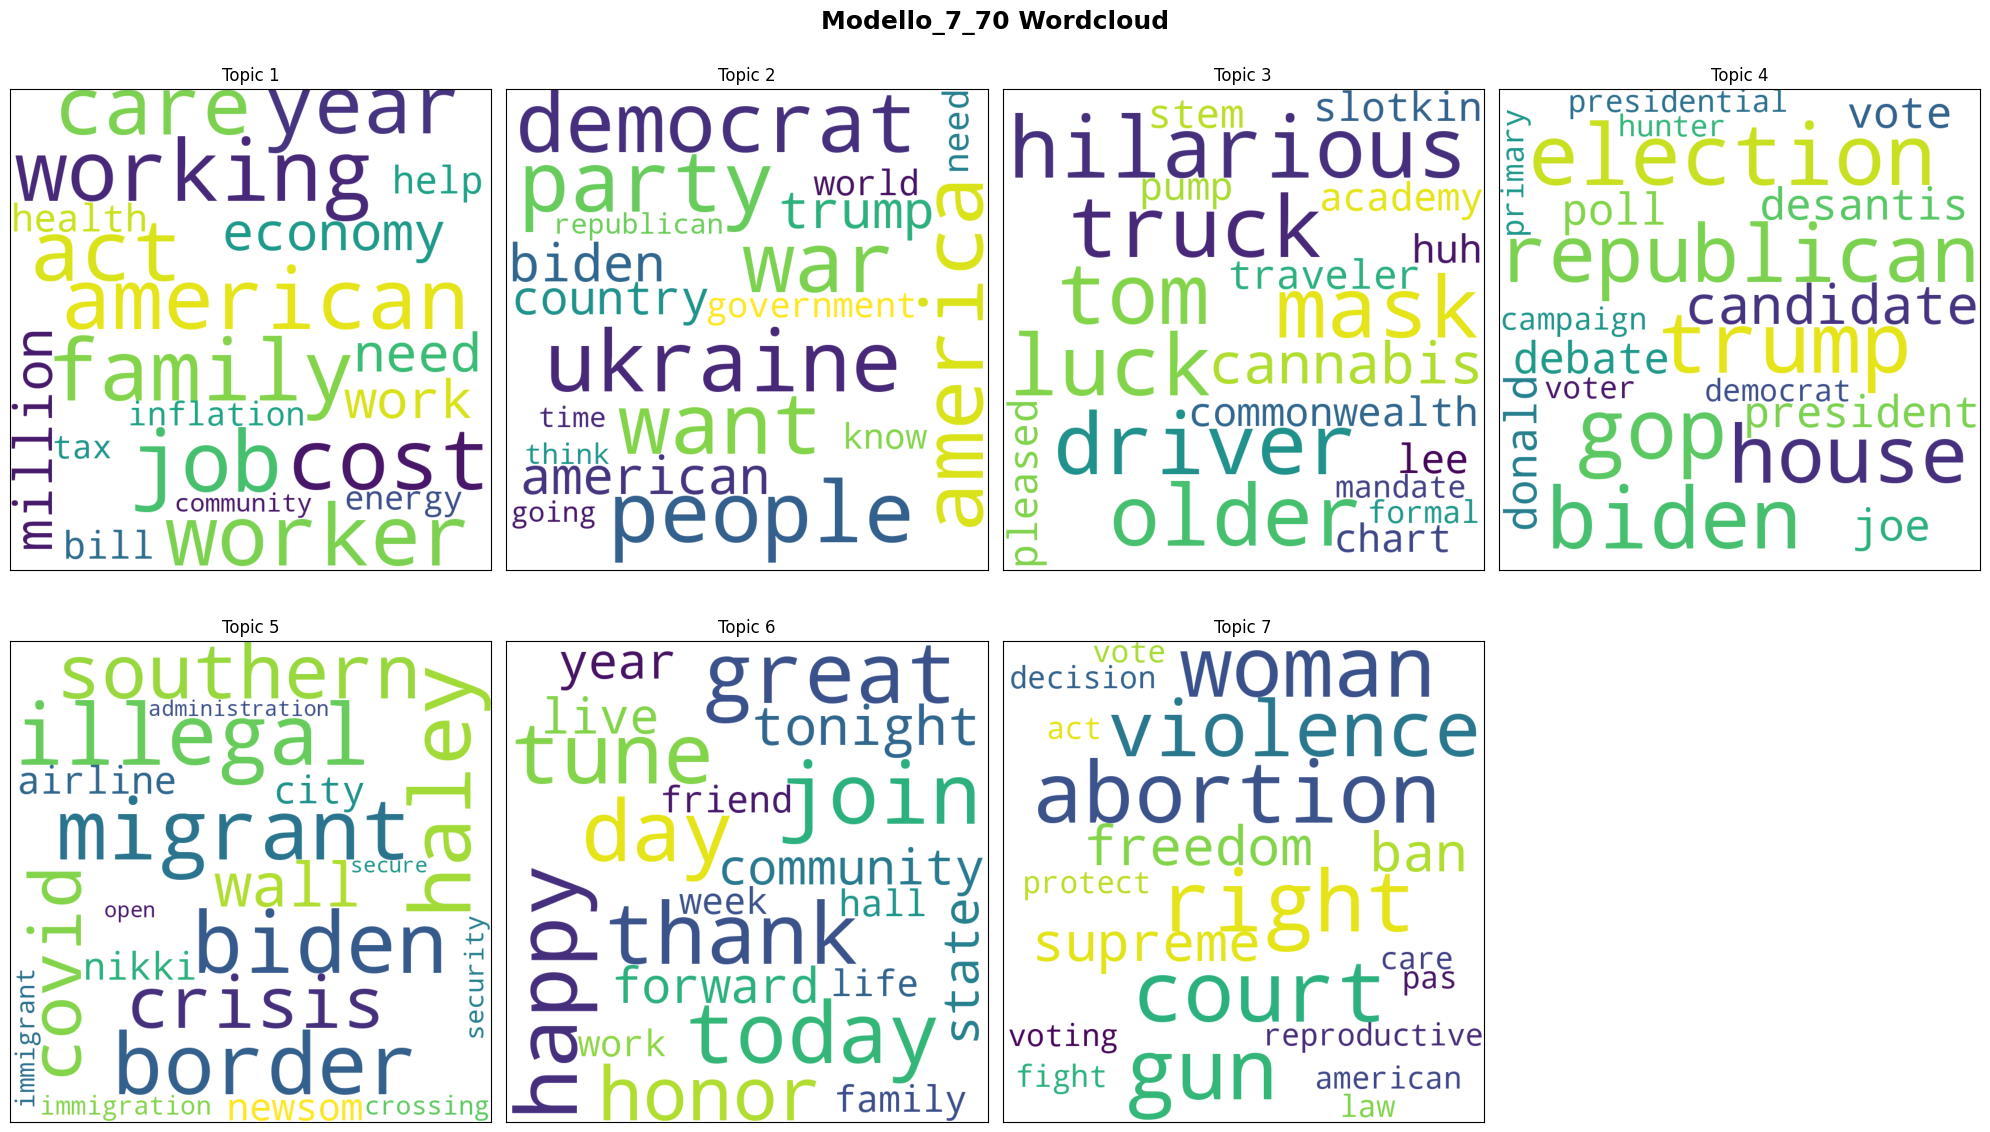

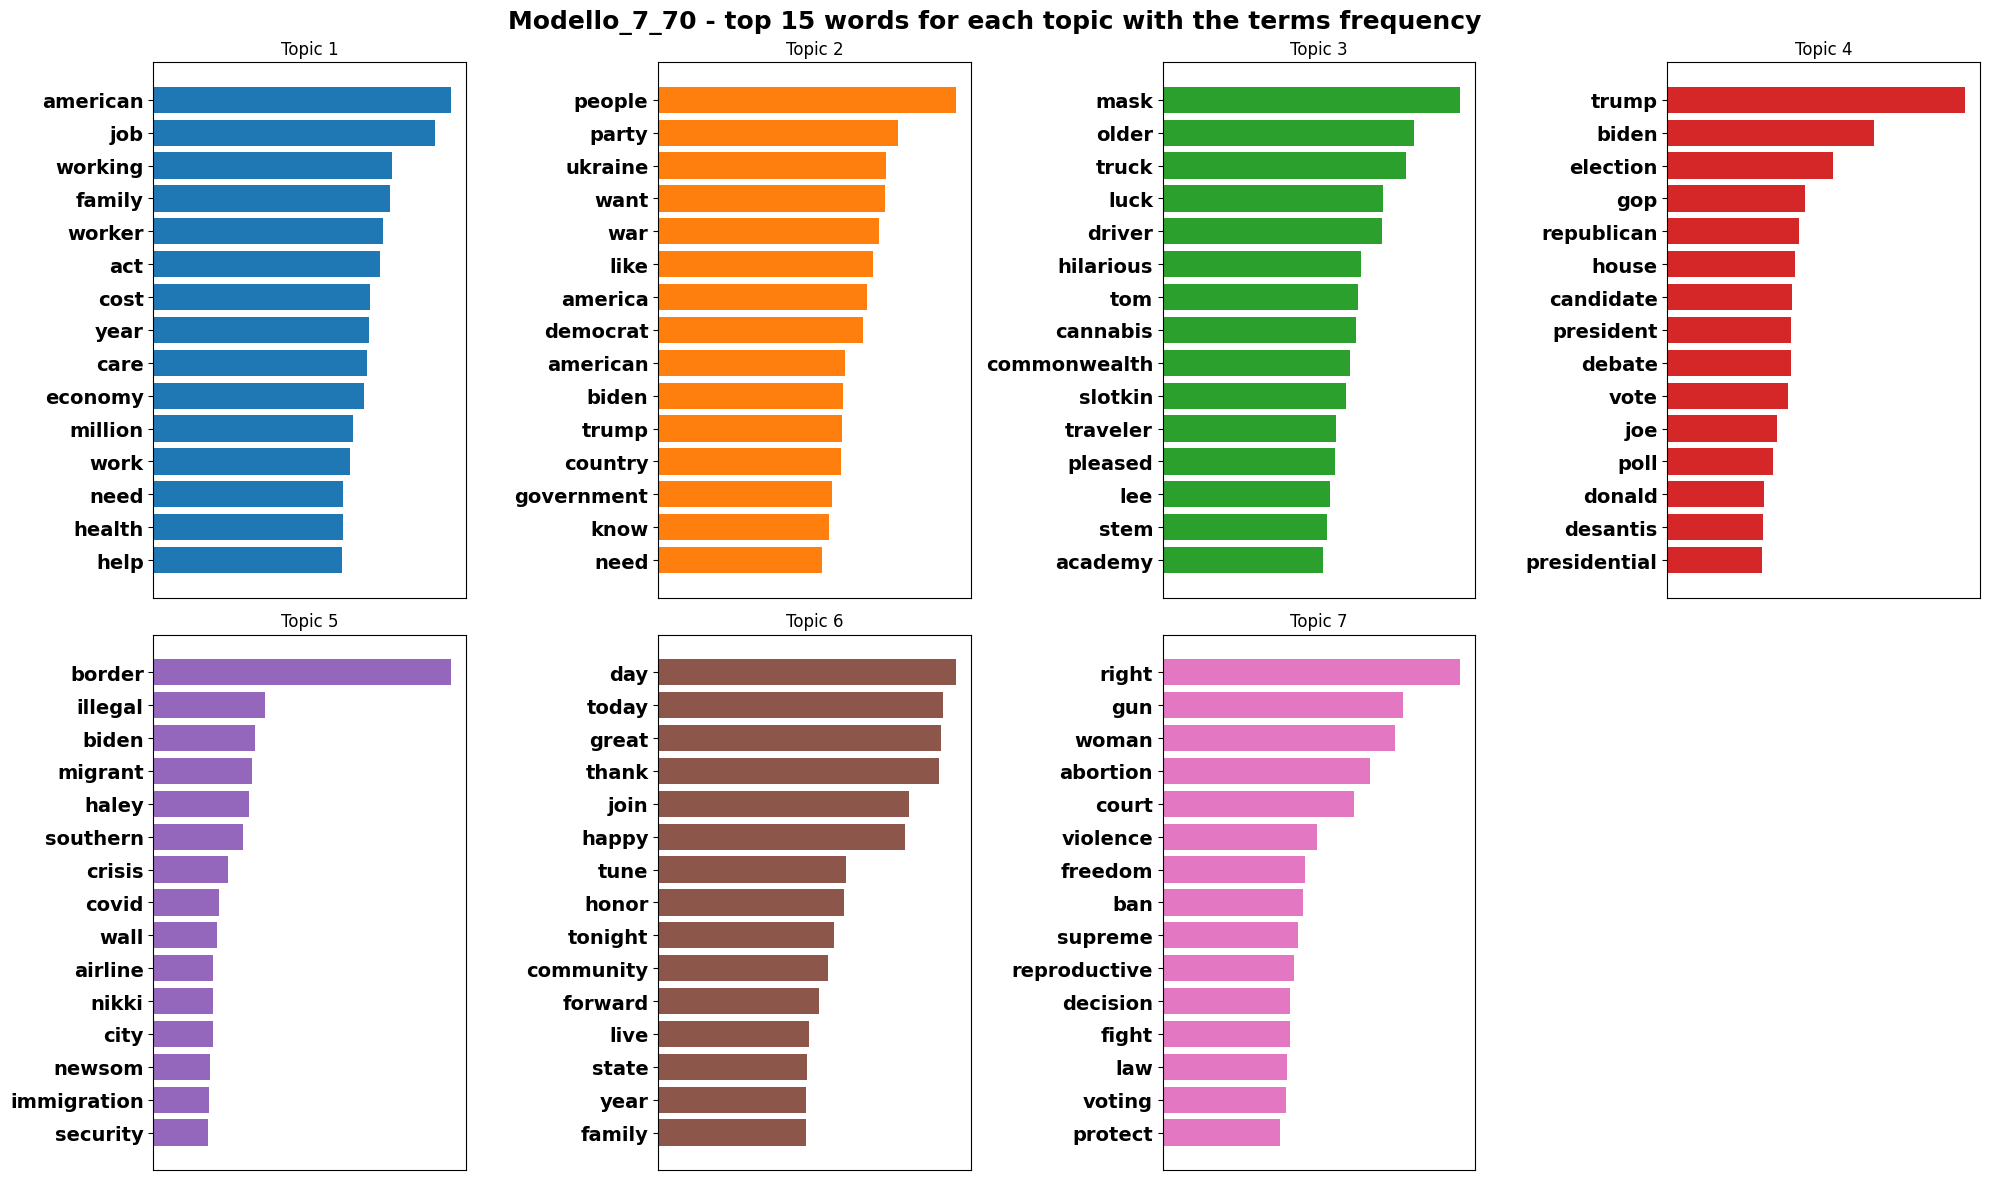

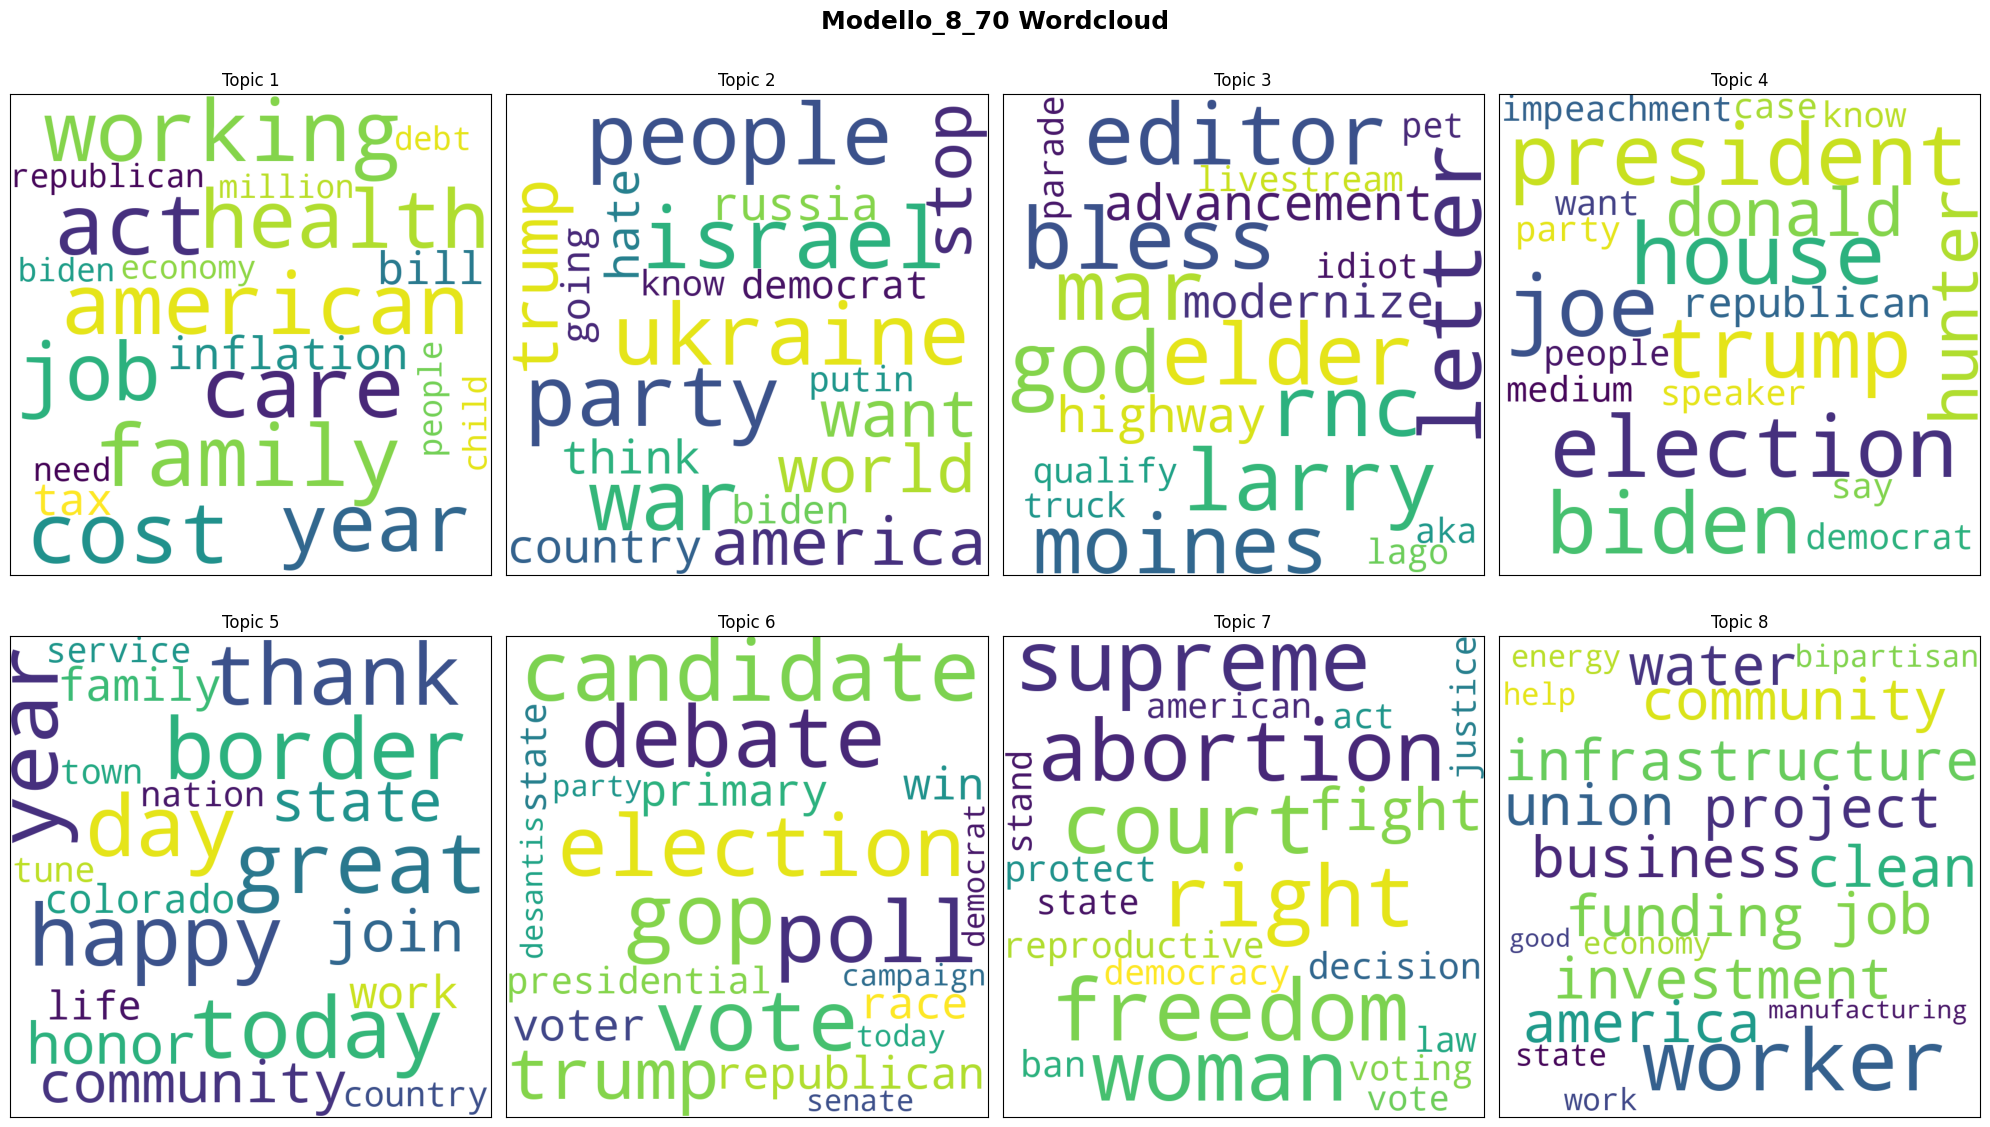

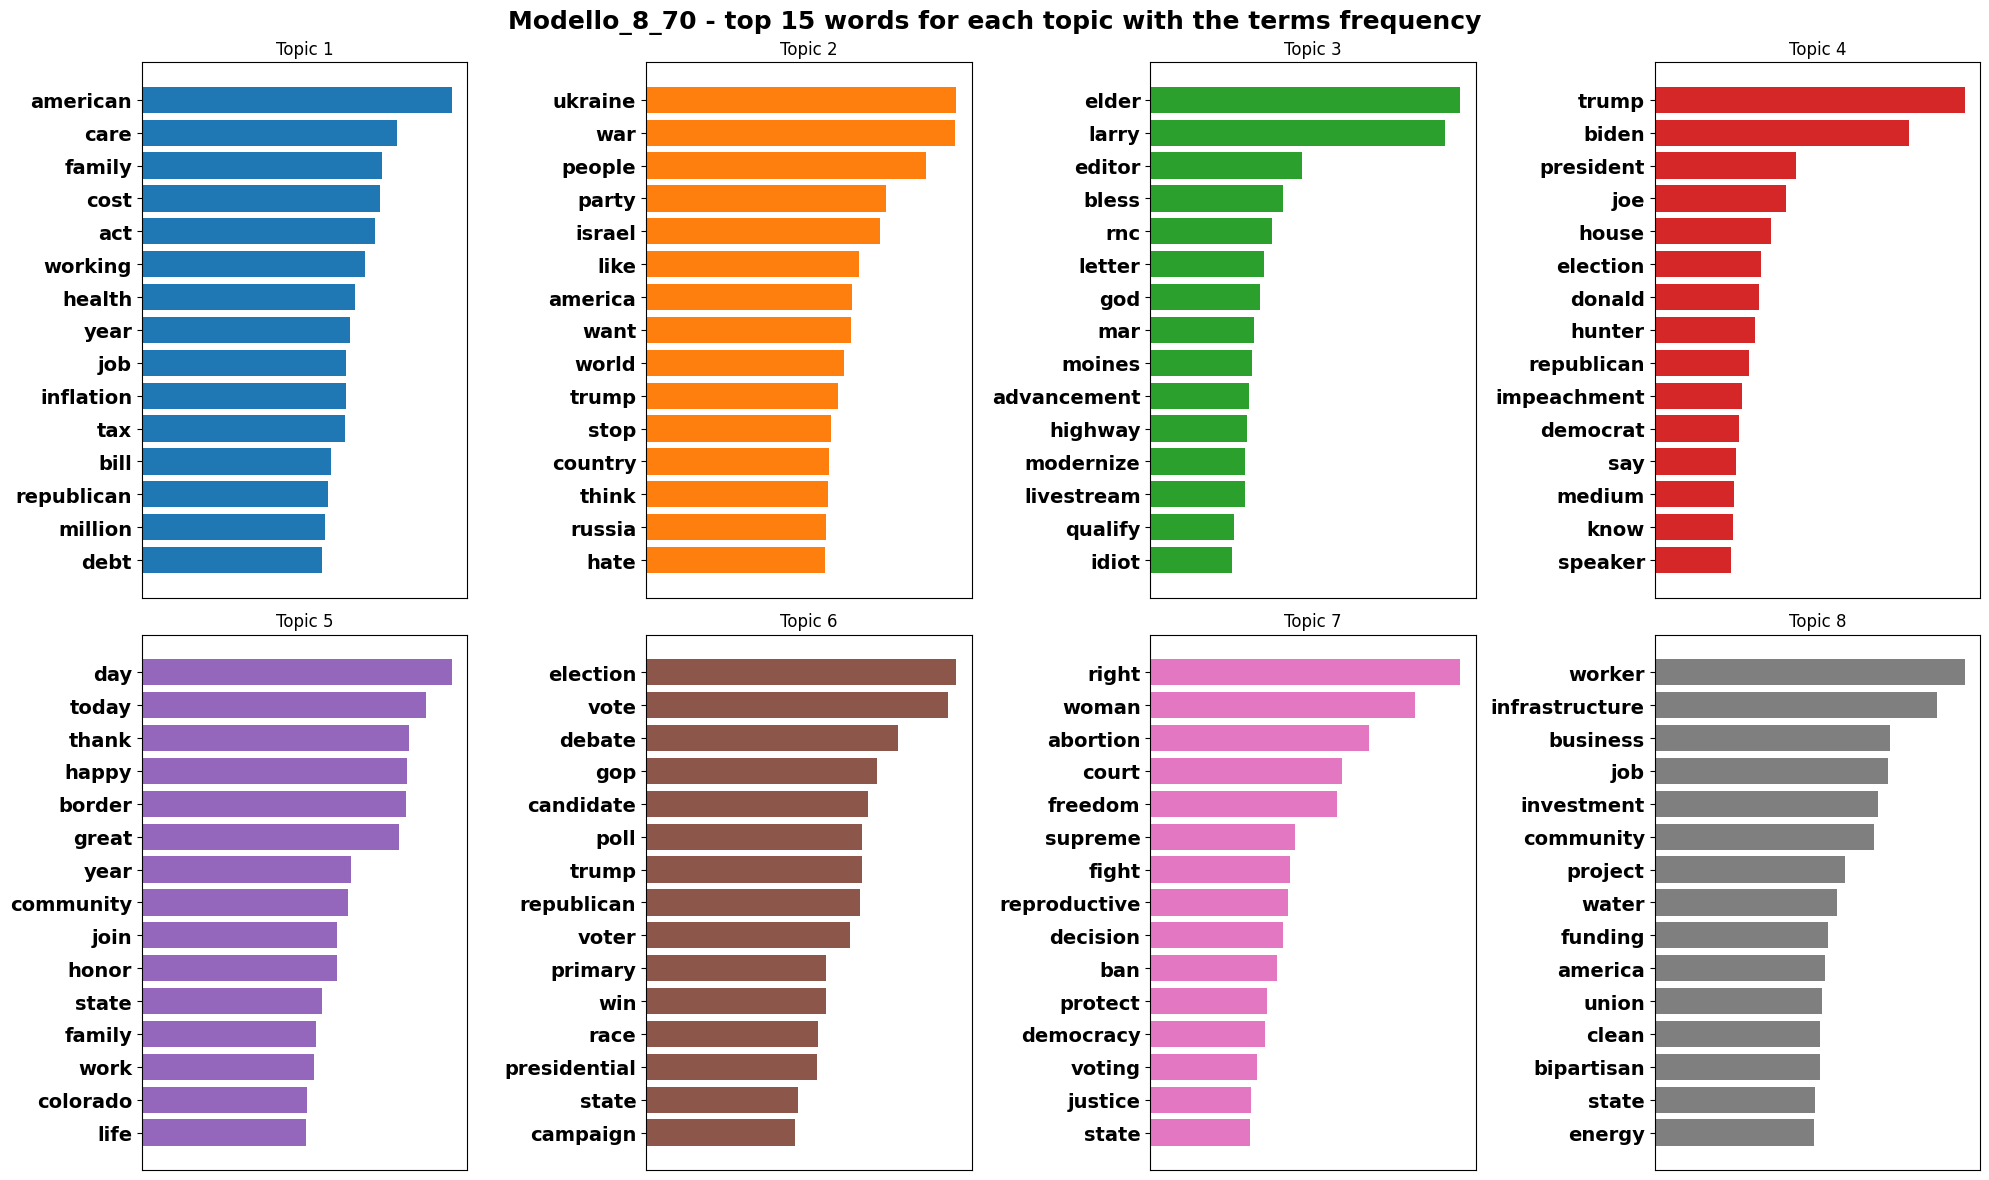

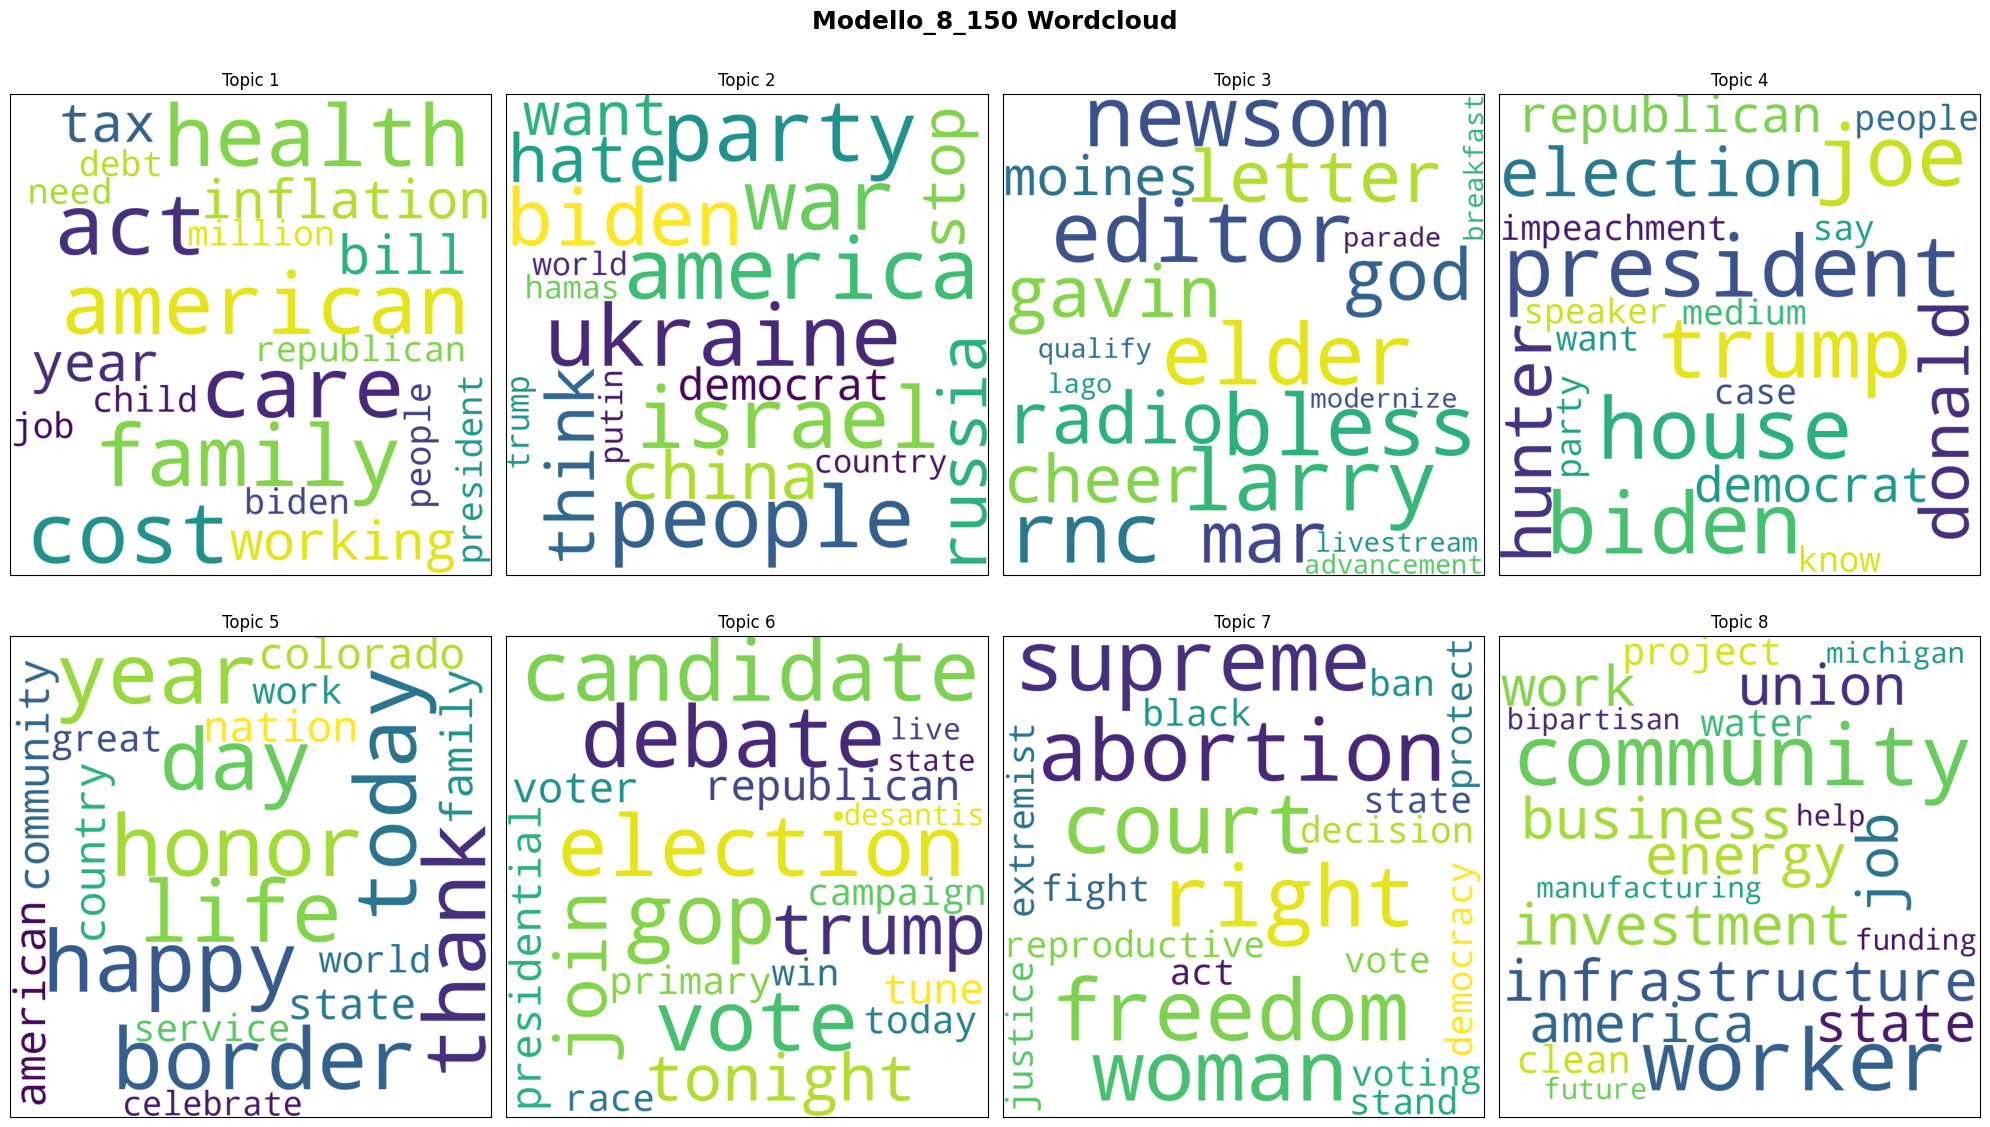

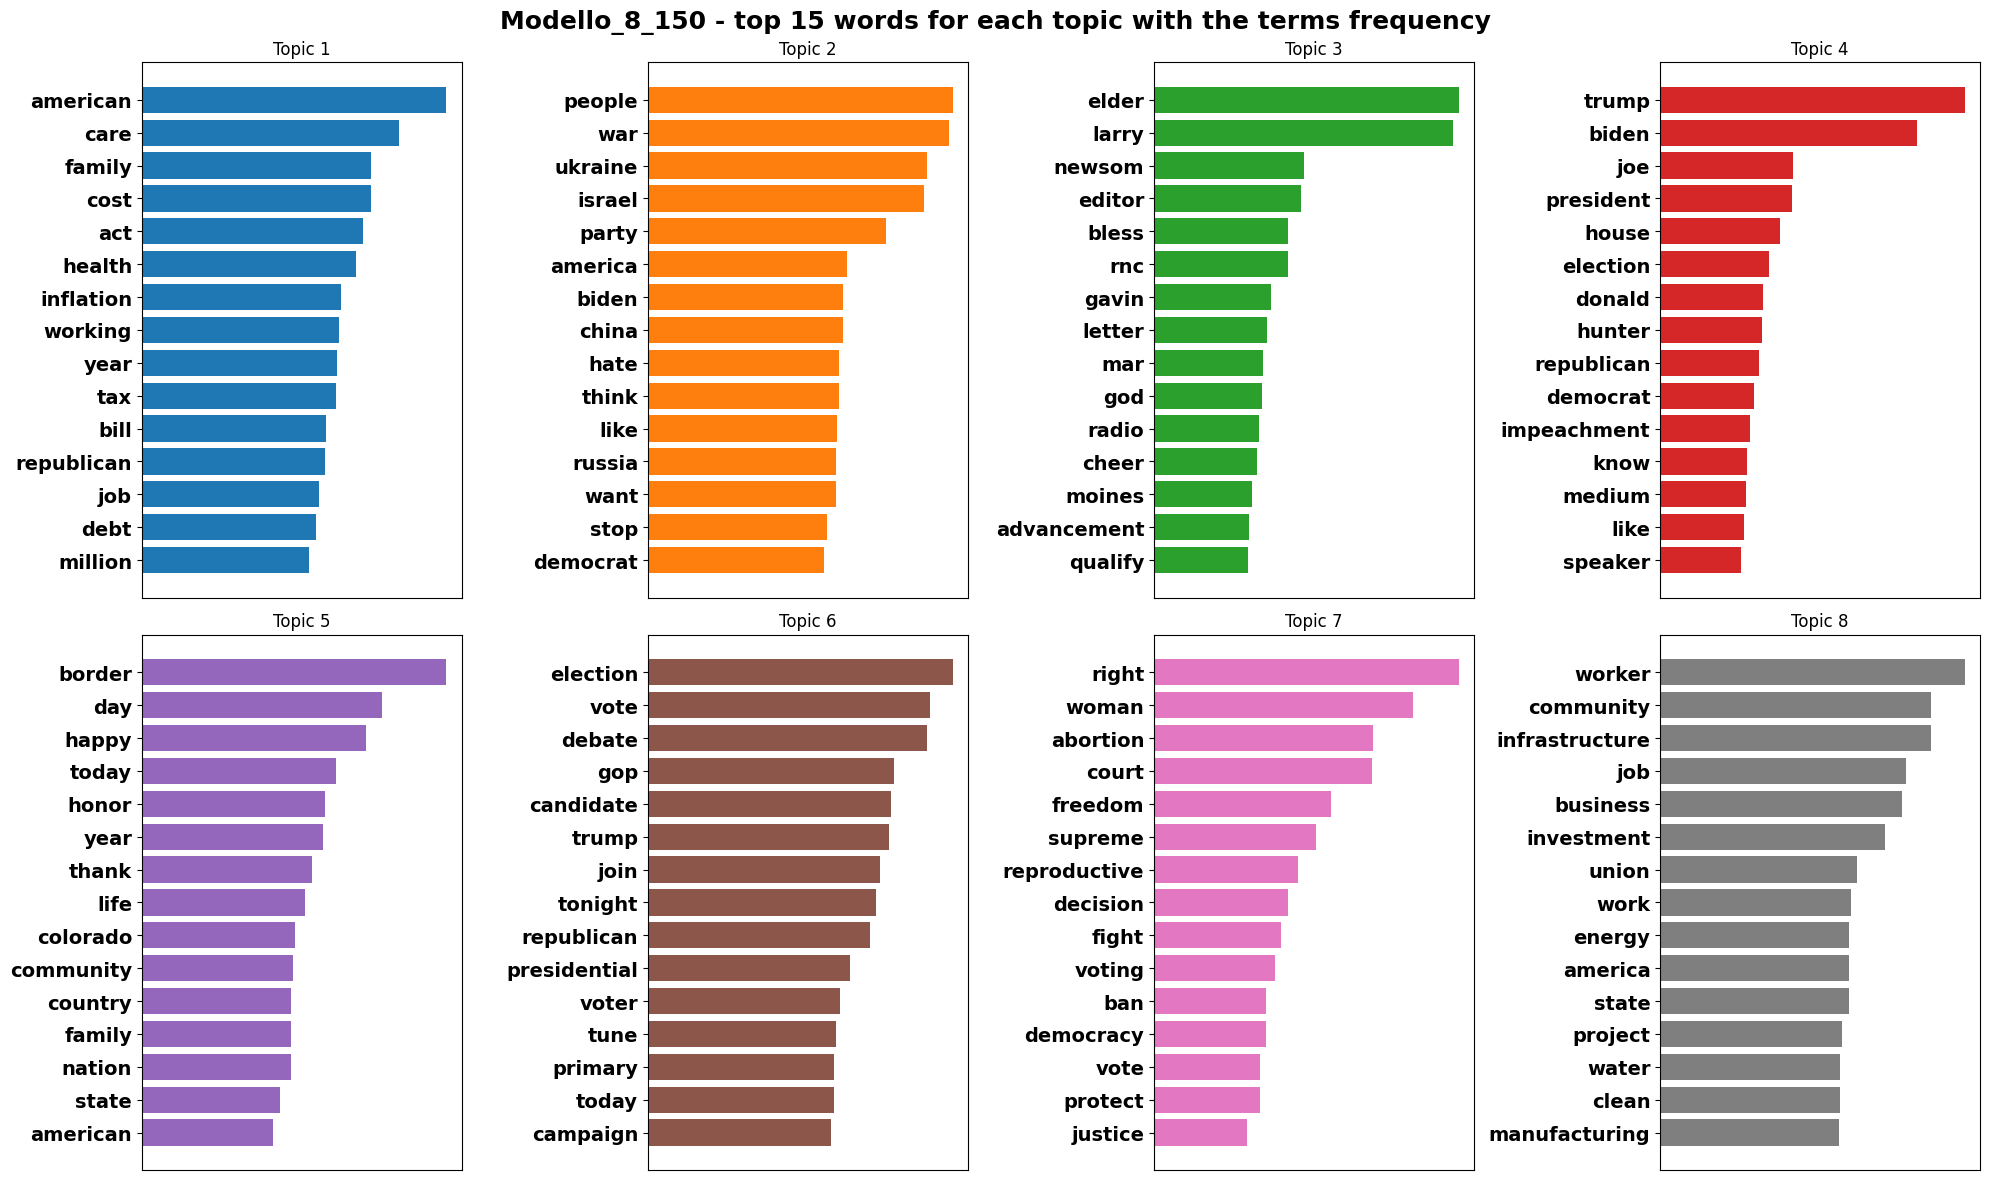

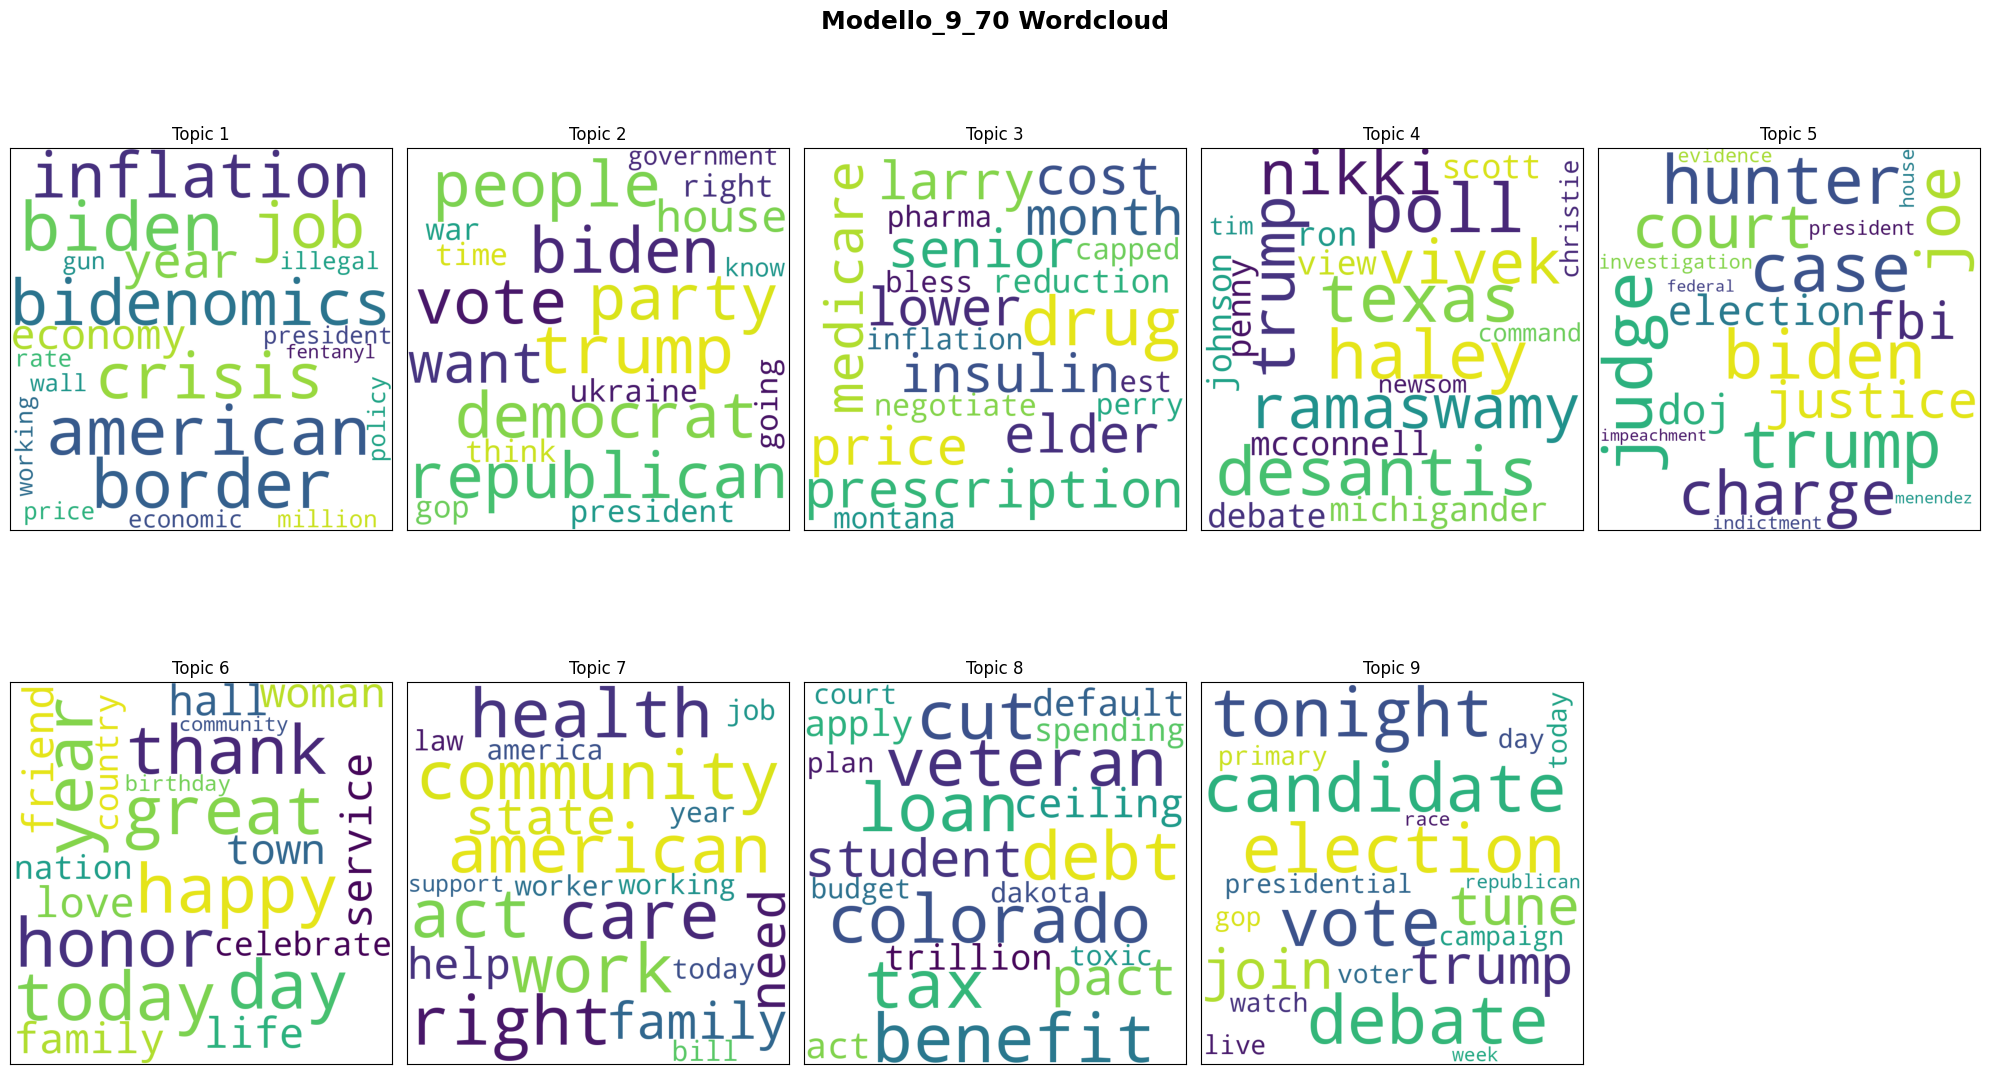

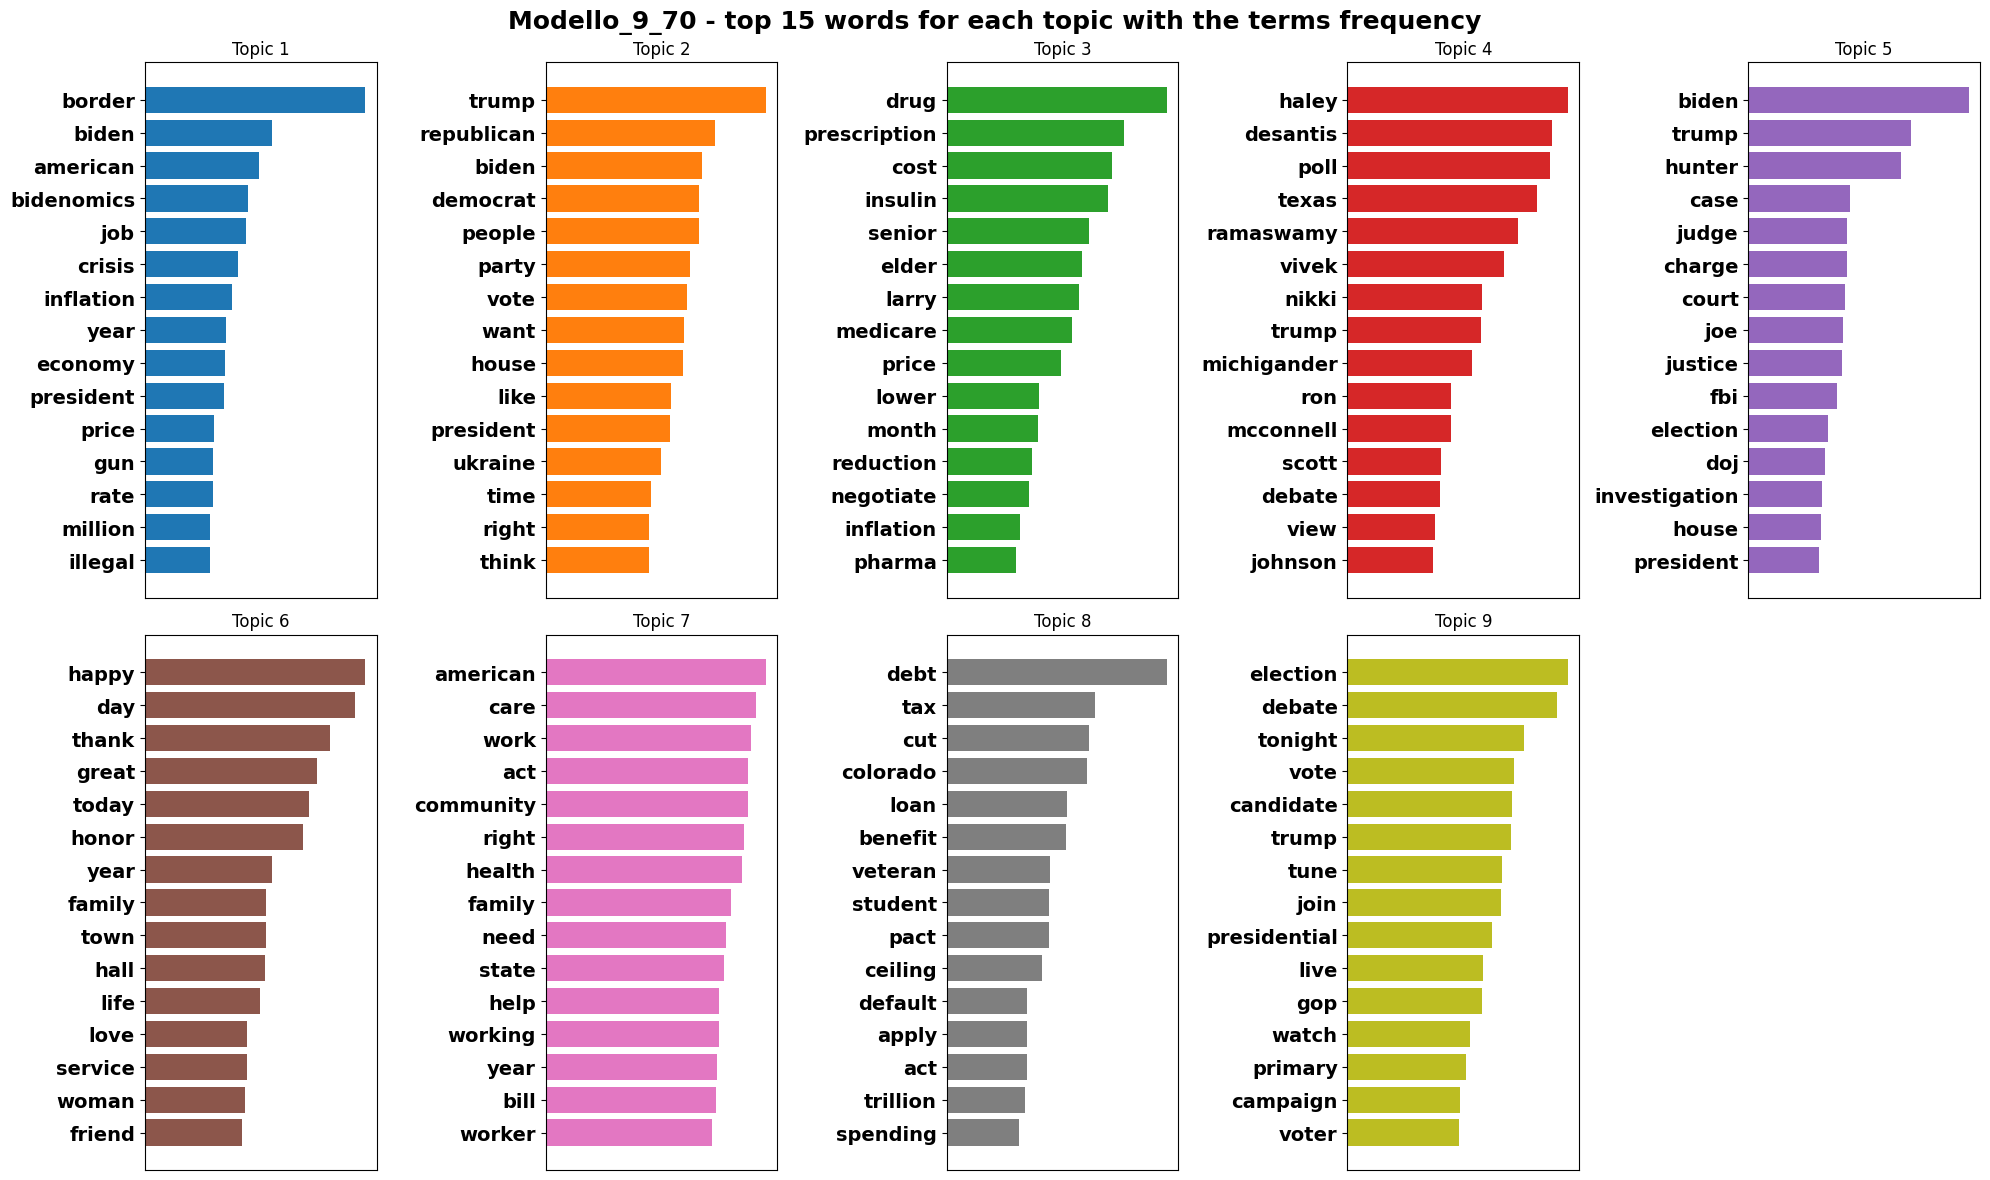

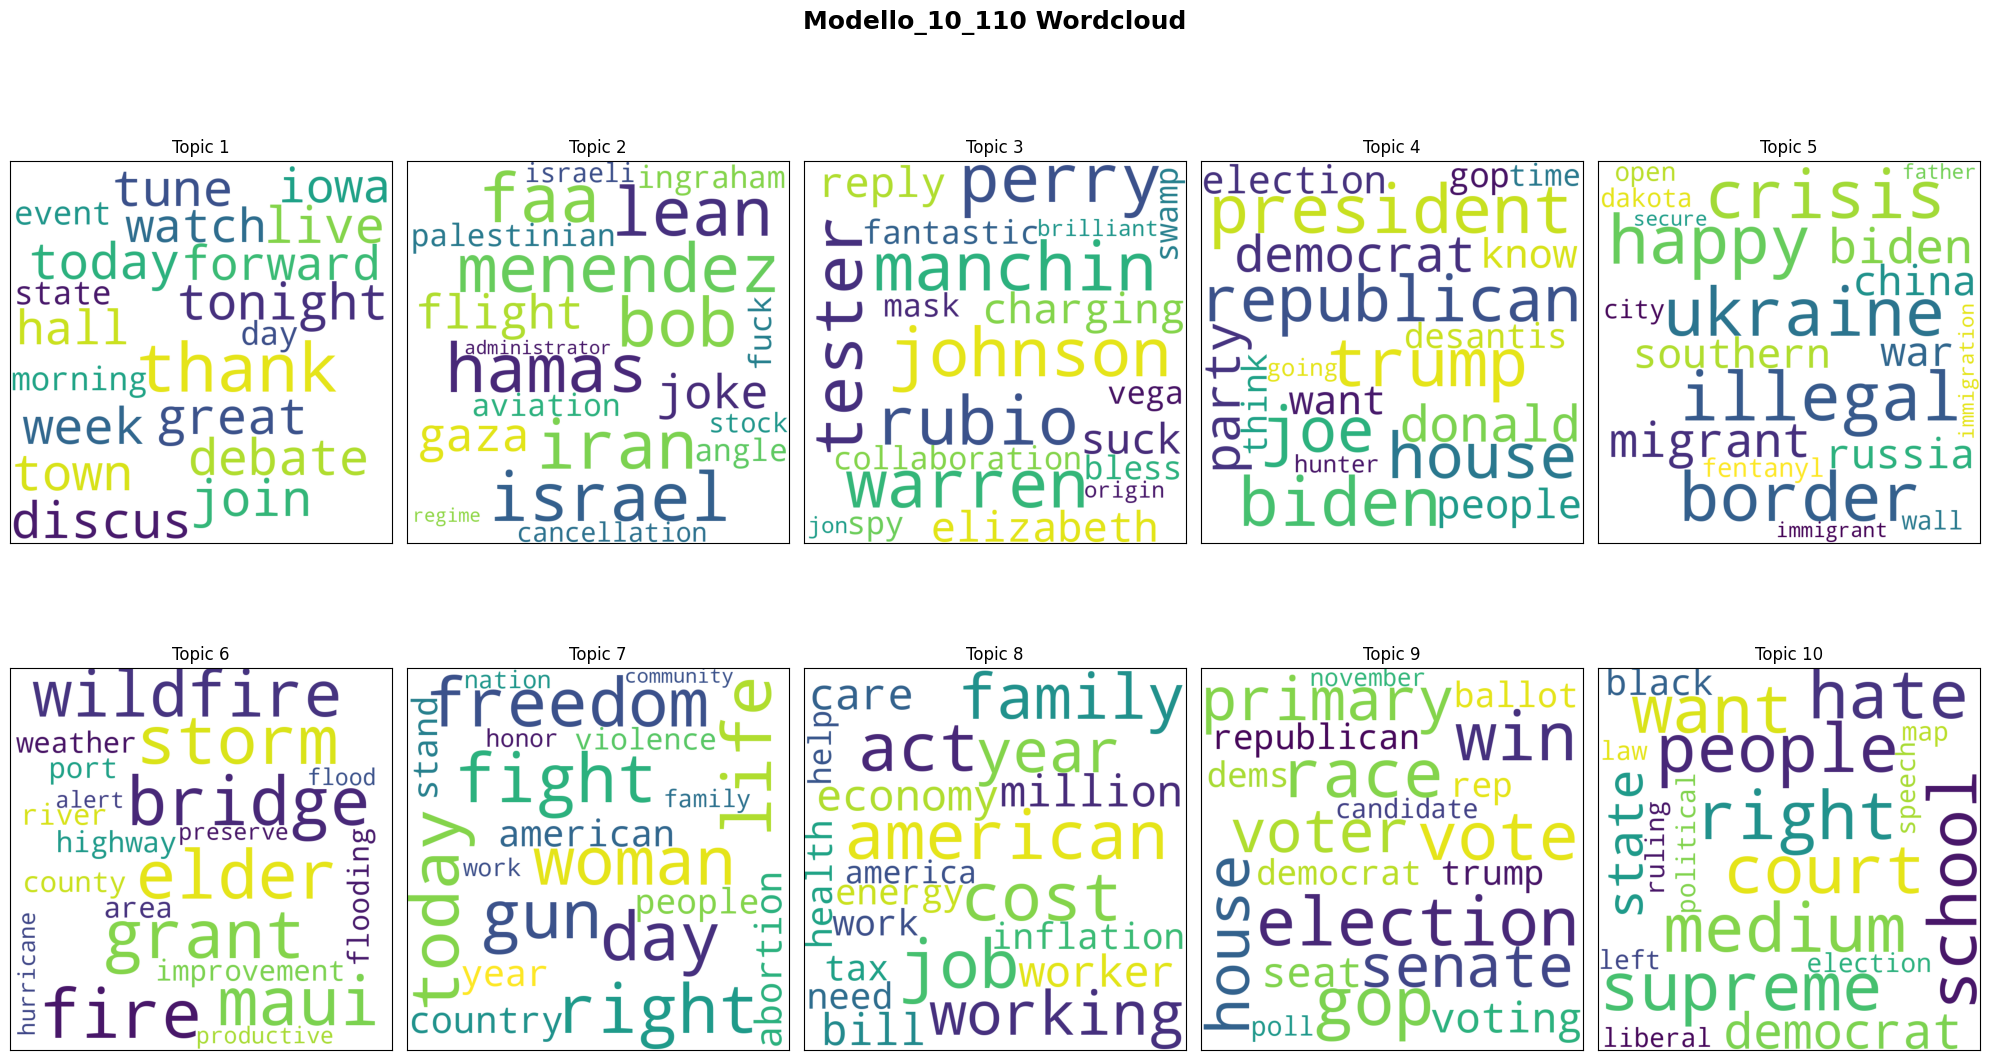

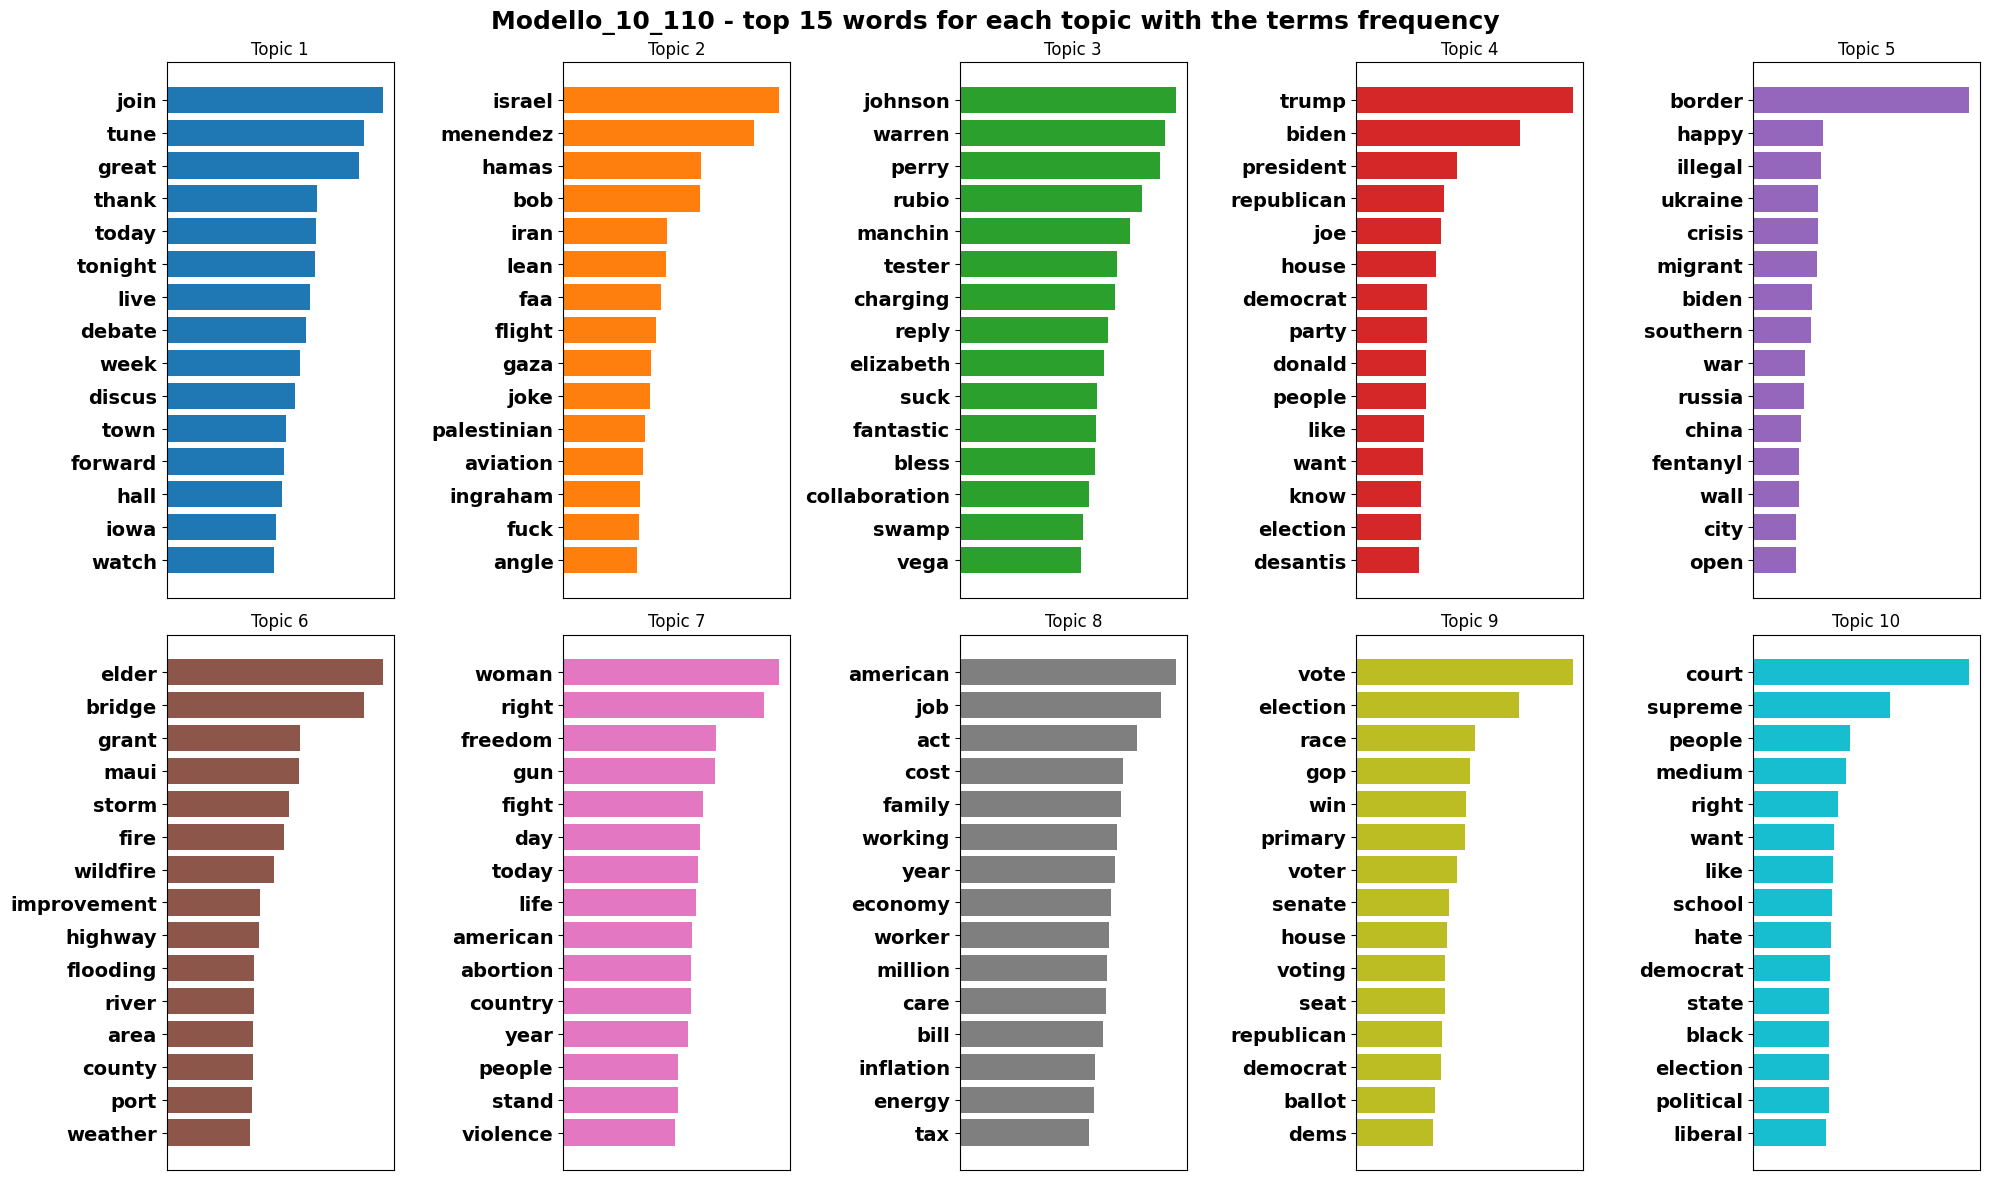

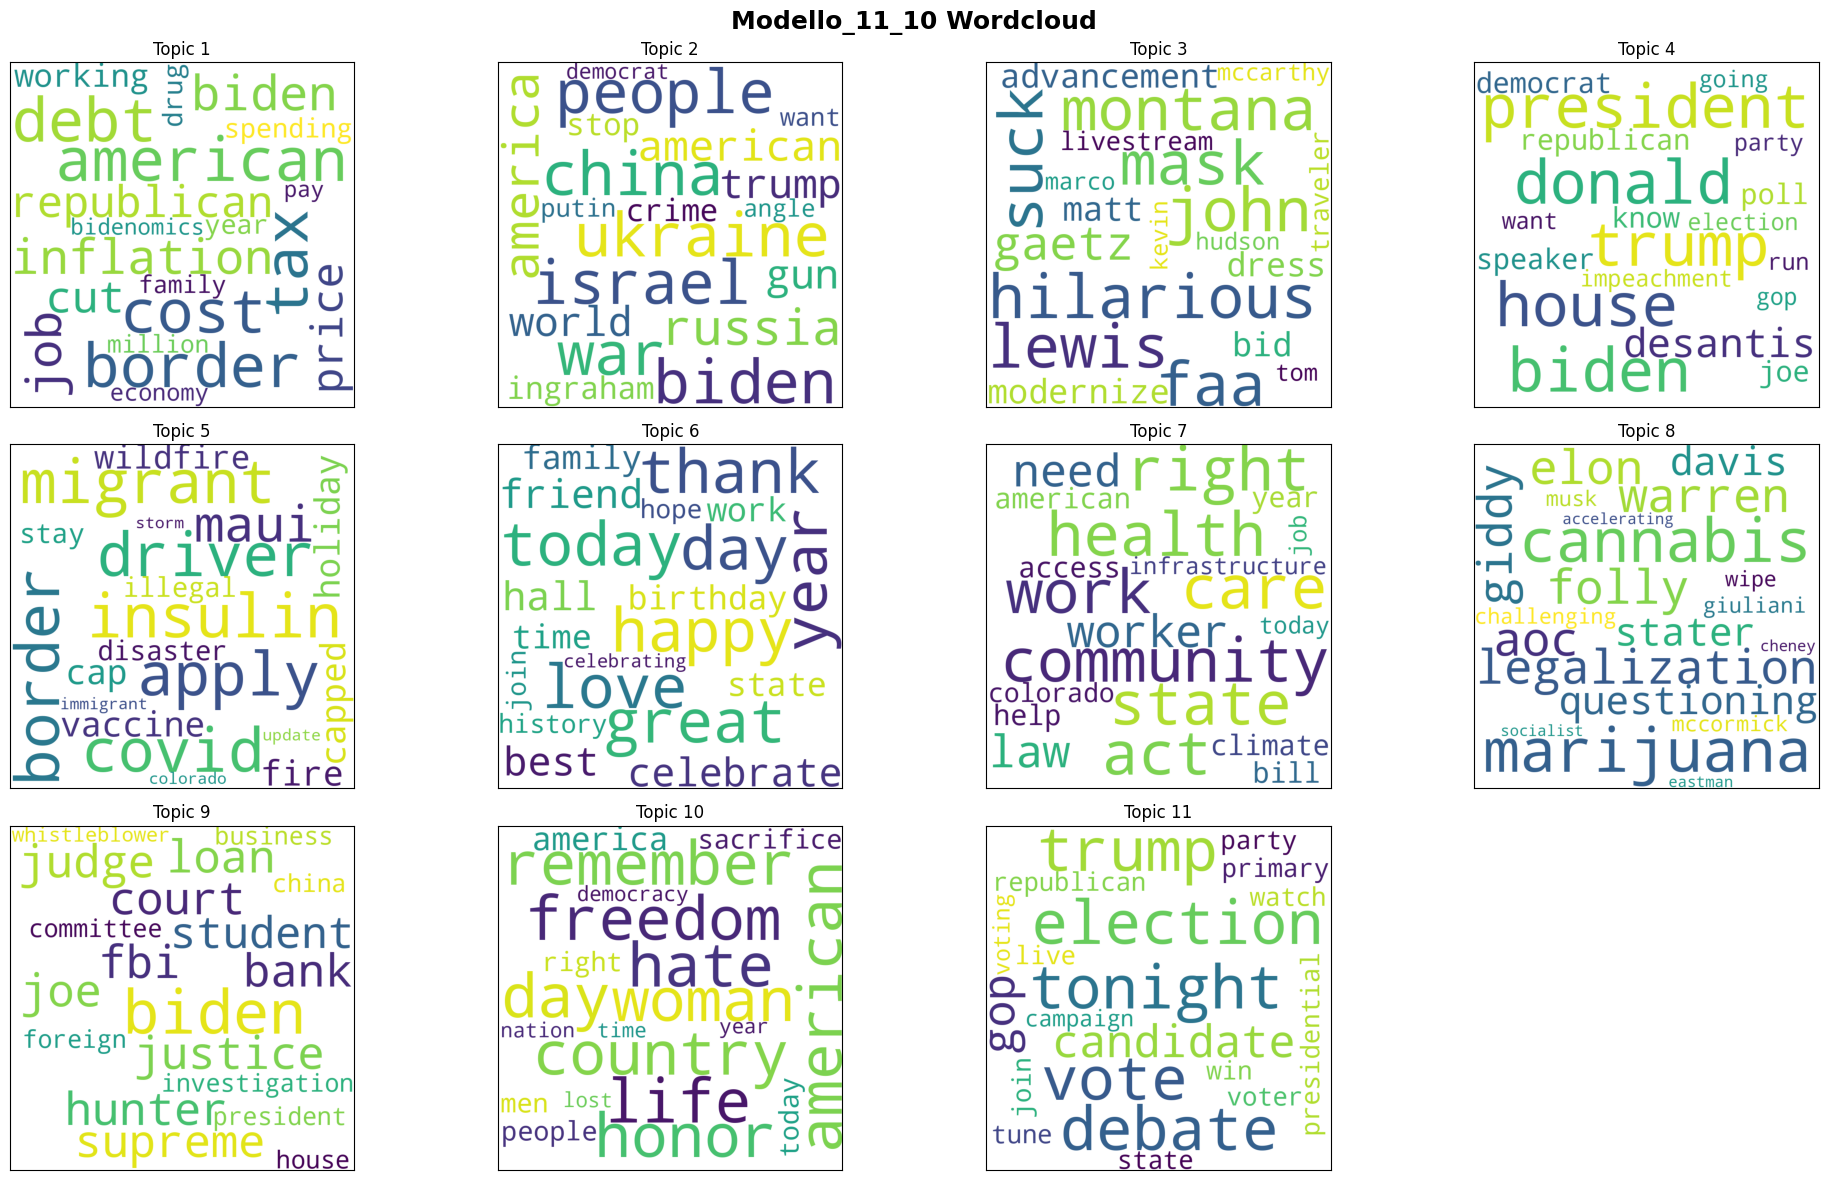

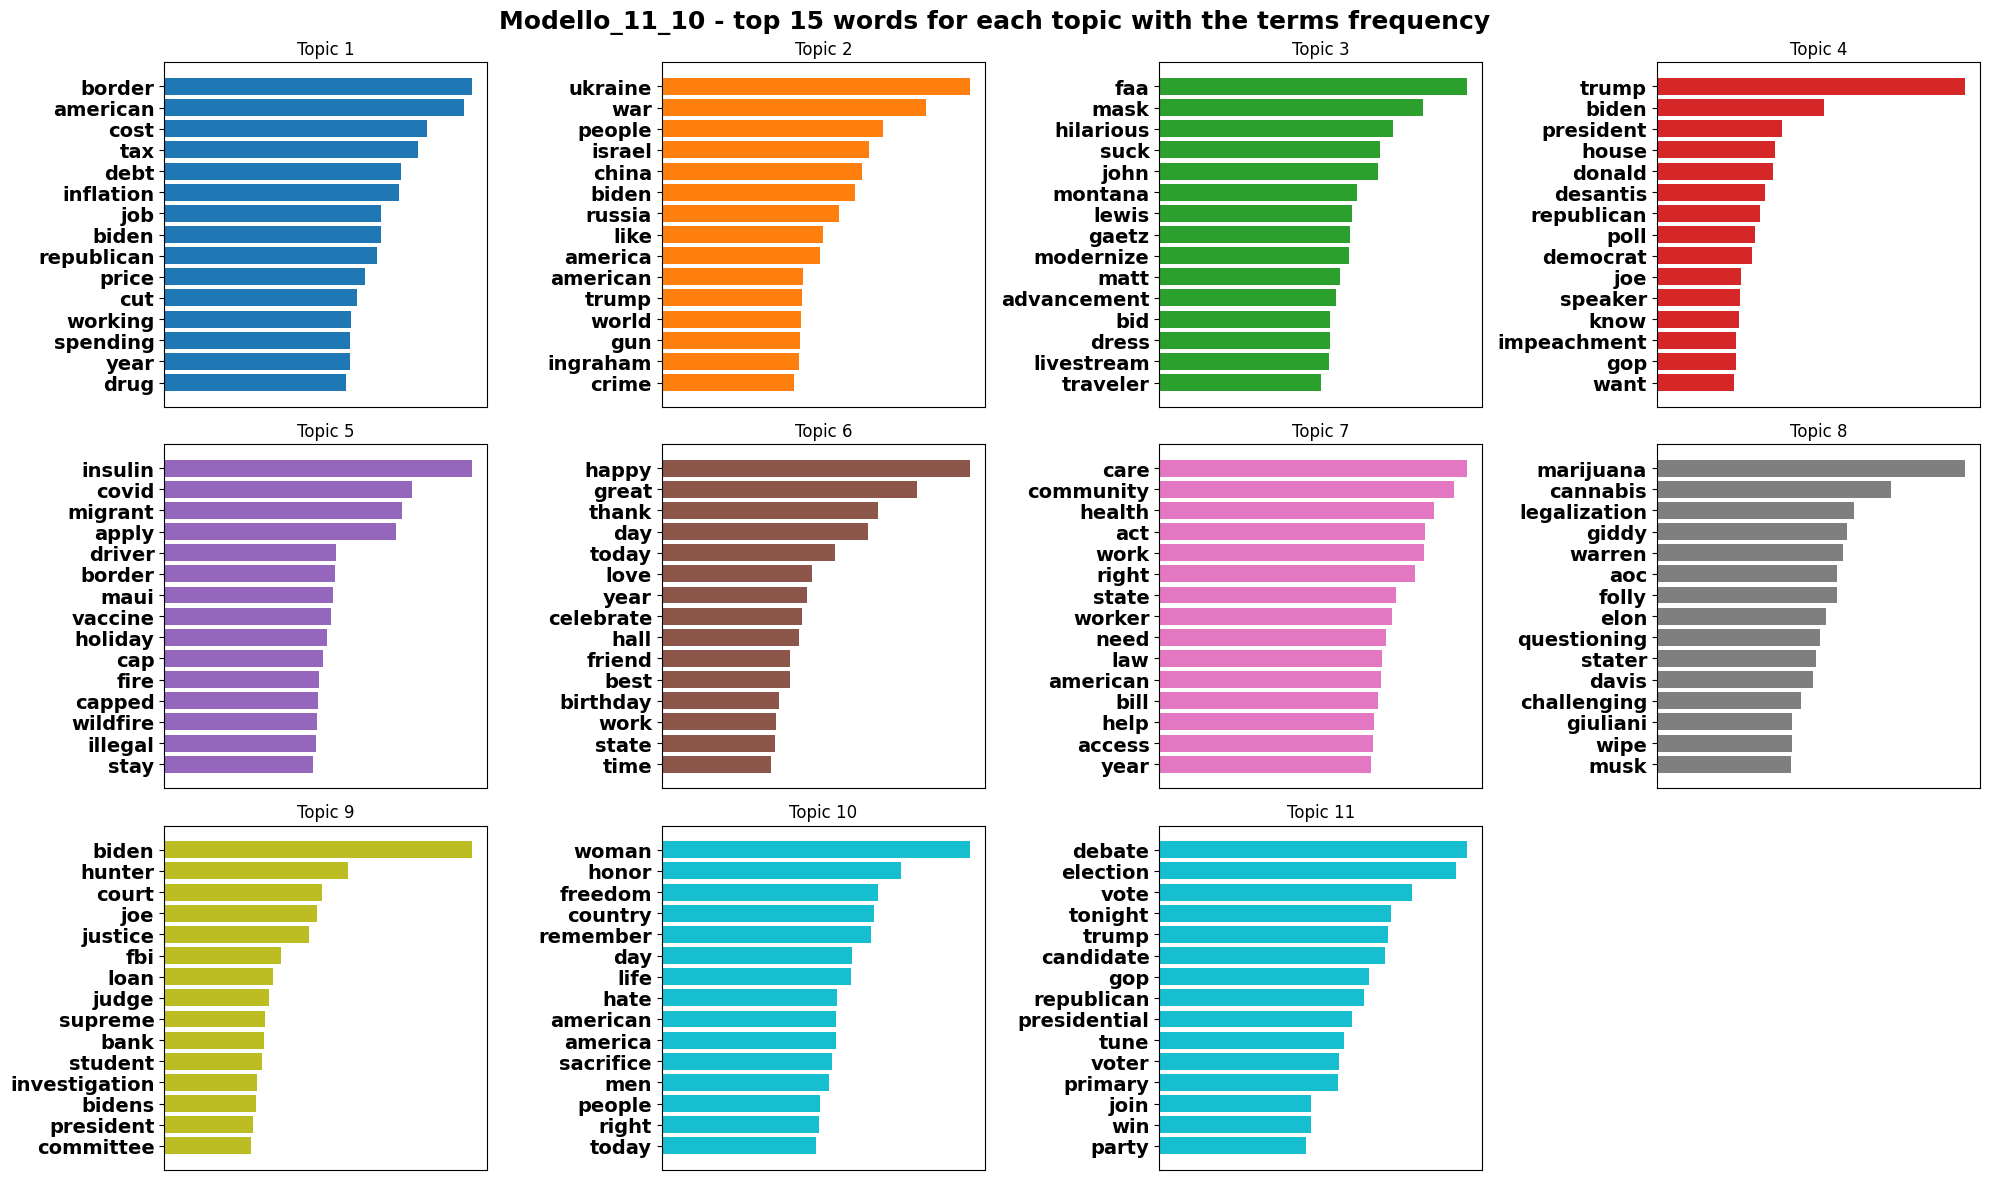

In [43]:
#Load models

model770 = LdaModel.load("models/lda_model_7_70_v2")

model870 = LdaModel.load("models/lda_model_8_70_v2")
model8150 = LdaModel.load("models/lda_model_8_150_v2")

model970 = LdaModel.load("models/lda_model_9_70_v2")

model10110 = LdaModel.load("models/lda_model_10_110_v2")

model1110 = LdaModel.load("models/lda_model_11_10_v2")

show = 15 #tot parole mostrate
get_grid_word_cloud("Modello_7_70 Wordcloud",get_word_cloud(model770, 7, 20), n_row = 2, n_col= 4, save_path="wordclouds/")
get_grid_top("Modello_7_70", model770, n_topic=7, n_words = show, save_path="./barchart/", n_row=2, n_col=4)

get_grid_word_cloud("Modello_8_70 Wordcloud",get_word_cloud(model870, 8, 20), n_row = 2, n_col= 4, save_path="wordclouds/")
get_grid_top("Modello_8_70", model870, n_topic=8, n_words = show, save_path="./barchart/", n_row=2, n_col=4)
get_grid_word_cloud("Modello_8_150 Wordcloud",get_word_cloud(model8150, 8, 20), n_row = 2, n_col= 4, save_path="wordclouds/")
get_grid_top("Modello_8_150", model8150, n_topic=8, n_words = show, save_path="./barchart/", n_row=2, n_col=4)

get_grid_word_cloud("Modello_9_70 Wordcloud",get_word_cloud(model970, 9, 20), n_row = 2, n_col= 5, save_path="wordclouds/")
get_grid_top("Modello_9_70", model970, n_topic=9, n_words = show, save_path="./barchart/", n_row=2, n_col=5)

get_grid_word_cloud("Modello_10_110 Wordcloud",get_word_cloud(model10110, 10, 20), n_row = 2, n_col= 5, save_path="wordclouds/")
get_grid_top("Modello_10_110", model10110, n_topic=10, n_words = show, save_path="./barchart/", n_row=2, n_col=5)

get_grid_word_cloud("Modello_11_10 Wordcloud",get_word_cloud(model1110, 11, 20), n_row = 3, n_col= 4, save_path="wordclouds/")
get_grid_top("Modello_11_10", model1110, n_topic=11, n_words = show, save_path="./barchart/", n_row=3, n_col=4)
    
